# Visualisation on online rertail dataset

# Import required libraries

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Load the dataset

In [33]:
df = pd.read_excel("Online_Retail.xlsx")


#  Data Cleaning

In [34]:

df.dropna(subset=["CustomerID"], inplace=True)  # remove rows without CustomerID
df["InvoiceDate"] = pd.to_datetime(df["InvoiceDate"])
df["TotalPrice"] = df["Quantity"] * df["UnitPrice"]

#  1. Total Sales by Country (BAR PLOT)

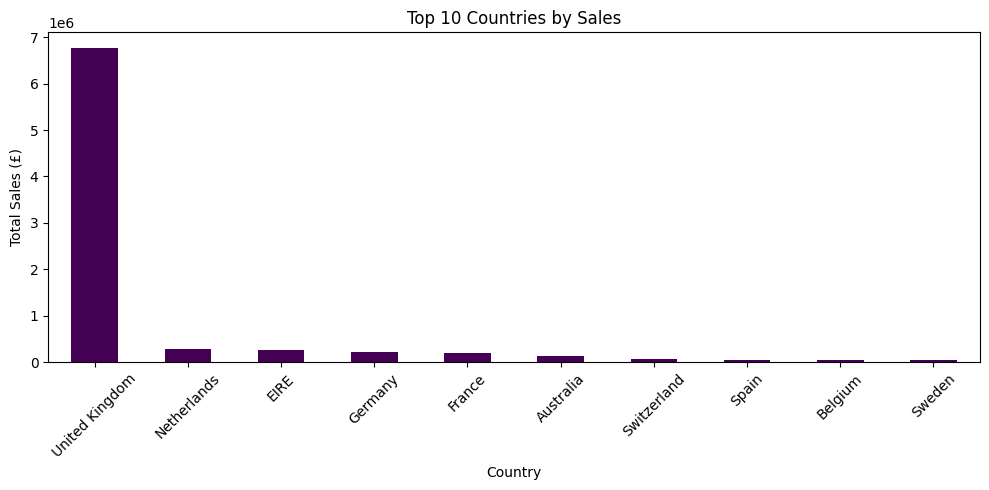

In [35]:

country_sales = df.groupby("Country")["TotalPrice"].sum().sort_values(ascending=False)[:10]
country_sales.plot(kind="bar", title="Top 10 Countries by Sales", figsize=(10, 5), colormap='viridis')
plt.ylabel("Total Sales (£)")
plt.xlabel("Country")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


#  2. Monthly Revenue Trend (LINE PLOT)

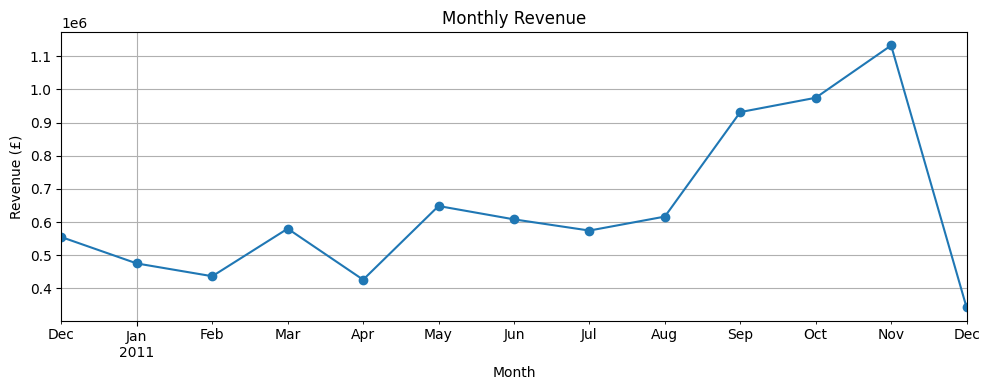

In [36]:

df["InvoiceMonth"] = df["InvoiceDate"].dt.to_period("M")
monthly_sales = df.groupby("InvoiceMonth")["TotalPrice"].sum()
monthly_sales.plot(kind="line", title="Monthly Revenue", marker='o', figsize=(10, 4))
plt.ylabel("Revenue (£)")
plt.xlabel("Month")
plt.grid(True)
plt.tight_layout()
plt.show()


#  3. Top Products by Quantity Sold (HORIZONTAL BAR GRAPH)

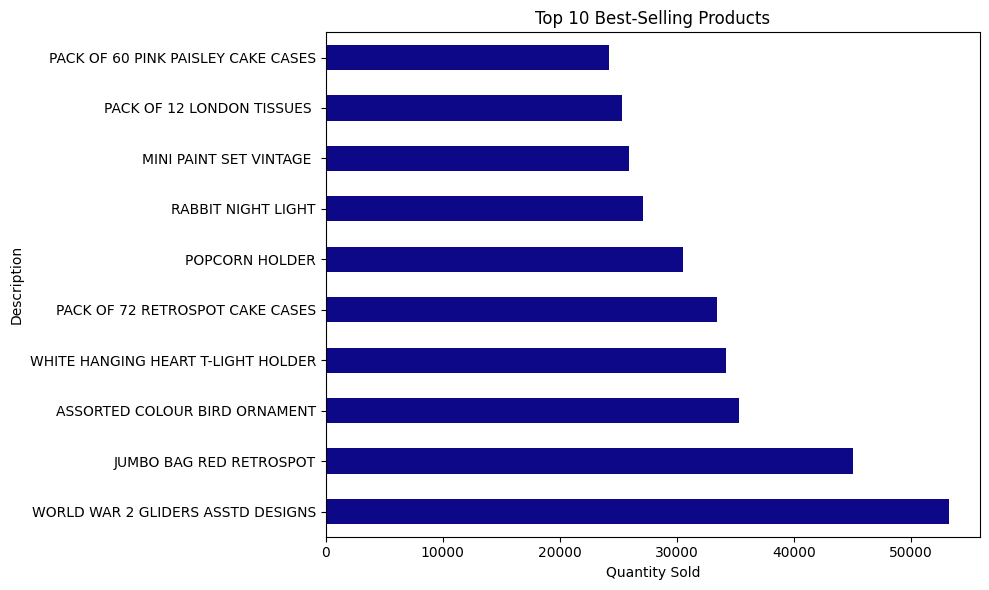

In [37]:

product_sales = df.groupby("Description")["Quantity"].sum().sort_values(ascending=False)[:10]
product_sales.plot(kind="barh", title="Top 10 Best-Selling Products", figsize=(10, 6), colormap='plasma')
plt.xlabel("Quantity Sold")
plt.tight_layout()
plt.show()

#  4.   Top 5 Countries by Transaction Count (PIE CHART)

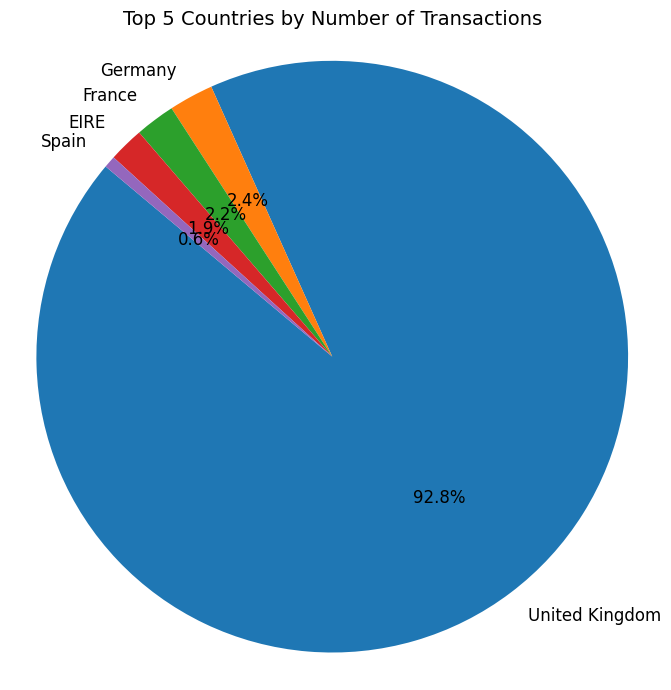

In [38]:
top_countries = df['Country'].value_counts().nlargest(5)

# Get labels and values
labels = top_countries.index
sizes = top_countries.values

# Plot using matplotlib's pie
plt.figure(figsize=(7, 7))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, textprops={'fontsize': 12})
plt.title("Top 5 Countries by Number of Transactions", fontsize=14)
plt.axis('equal')  # Equal aspect ratio ensures pie is drawn as a circle
plt.tight_layout()
plt.show()


# 5.Order Value by Country (BOX PLOT)

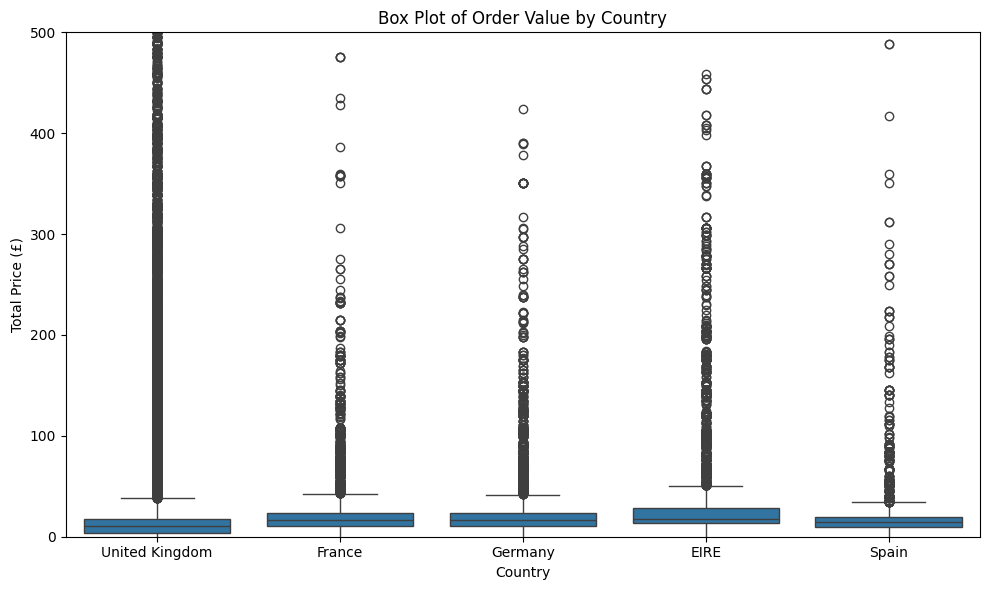

In [39]:
top_countries = df["Country"].value_counts().nlargest(5).index
filtered_df = df[df["Country"].isin(top_countries)]

plt.figure(figsize=(10, 6))
sns.boxplot(data=filtered_df, x="Country", y="TotalPrice")
plt.ylim(0, 500)  # adjust based on your need
plt.title("Box Plot of Order Value by Country")
plt.ylabel("Total Price (£)")
plt.tight_layout()
plt.show()
